#Input imdb list url

In [1]:
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
import pandas as pd
my_url=input("Enter url imdb list kind: ")
uclient=uReq(my_url)
html_extract=uclient.read()
uclient.close()
soup_page=soup(html_extract,"html.parser")
data=soup_page.find_all("td",{"class":"titleColumn"})
data_rating=soup_page.find_all("td",{"class":"imdbRating"})

Enter url imdb list kind: https://www.imdb.com/chart/toptv/?ref_=nv_tvv_250


#Grabbing the data and saving in a list 

In [2]:
d={'rank': list(),'name':list(),'year':list(),'ratings':list()}
for x in range(len(data)):
    r=data_rating[x].text
    t=data[x].text
    t.strip()
    for i in [',','.','(',')']:
        t=t.replace(i,'')
        if i=='.':
            r=r.replace('\n','')
            continue
        r=r.replace(i,'')   
    t=t.split('\n')[1:-1]
    d['rank'].append(int(t[0]))
    d['name'].append(t[1])
    d['year'].append(int(t[2]))
    d['ratings'].append(float(r))
    

#saved data to be exported in csv file format

In [3]:
df=pd.DataFrame(d,columns=["rank","name","year","ratings"])
df.set_index('rank')
df.to_csv('imdb.csv', index=False)

In [4]:
df.query('year>1970 and year<1975')

,rank,name,year,ratings
15,16,The World at War,1973,9.1
170,171,El Chavo del Ocho,1972,8.5


#data pre-process

In [5]:
res=df.sort_values(['year'],axis=0)
res=res.drop(['name','rank'],axis=1)
result=res.groupby(['year'],as_index=False).mean()
counter=res.groupby(["year"],as_index=False).count()
counter=counter.drop('year',axis=1)
counter.rename(columns = {'ratings':'counts'}, inplace = True)
final_df = pd.concat([result, counter], axis=1)

In [6]:
def output(df):
    return df['ratings']+0.1*df['counts']
final_df['final_value']=final_df.apply(output, axis=1)

#Visualization

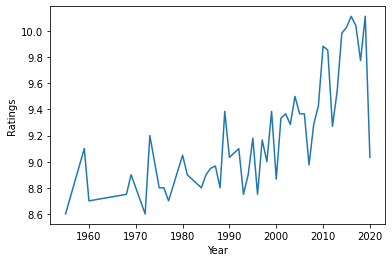

In [7]:
from matplotlib import pyplot as plt
plt.plot(final_df.year,final_df.final_value)
plt.xlabel("Year")
plt.ylabel("Ratings")
plt.show()